<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2022-23
</center></h1>

<h2><center>Assignment 2 – PS2 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
     <li><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready.Most effective visuals would fetch maximum credits</div></li>    
    <li><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></li>
</ol>

<h1>Objective</h1>
<h4>Subscription prediction from the given dataset</h4>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: (67)</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Senthilkumar K</td>
    <td>2022DA04148</td>
  </tr>
  <tr>
    <td>Surya K</td>
    <td>2022DA04742</td>
  </tr>
  <tr>
    <td>Subbu K</td>
    <td>2022DA04079</td>
  </tr>
  <tr>
    <td>Shri Ram K</td>
    <td>2022DA04363</td>
  </tr>
</table>

##  Download and Prep the Data: 1 Mark

Import the modules needed

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Download the dataset and read it into a dataframe

In [46]:
file_path ='C:/temp/dvi-a2-ps2-data.csv'
df = pd.read_csv(file_path)

First five items in the dataset.

In [50]:
print(df.head())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  \
0          1.4     

Find out how many entries there are in the dataset.

In [51]:
print(df.tail())

       age         job  marital            education  default housing loan  \
41183   59     retired  married          high.school  unknown      no  yes   
41184   31   housemaid  married             basic.4y  unknown      no   no   
41185   42      admin.   single    university.degree  unknown     yes  yes   
41186   48  technician  married  professional.course       no      no  yes   
41187   25     student   single          high.school       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
41183  telephone   jun         thu  ...         1    999         0   
41184  telephone   may         thu  ...         2    999         0   
41185  telephone   may         wed  ...         3    999         0   
41186  telephone   oct         tue  ...         2    999         0   
41187  telephone   may         fri  ...         4    999         0   

          poutcome emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
41183  nonexistent          1.4  

In [52]:
num_entries = df.shape[0]
# Print the number of entries
print("Number of entries in the dataset:", num_entries)

Number of entries in the dataset: 41188


Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

In [53]:
# Cleaning and Preprocessing the data
# Remove the specified columns from the DataFrame
df.drop(columns=['default','day_of_week','previous','poutcome','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'], inplace=True)

# Check the updated DataFrame
print(df.head())

   age          job  marital          education housing loan   contact month  \
0   44  blue-collar  married           basic.4y     yes   no  cellular   aug   
1   53   technician  married            unknown      no   no  cellular   nov   
2   28   management   single  university.degree     yes   no  cellular   jun   
3   39     services  married        high.school      no   no  cellular   apr   
4   55      retired  married           basic.4y     yes   no  cellular   aug   

   duration  campaign  pdays  emp_var_rate  subscription  
0       210         1    999           1.4             0  
1       138         1    999          -0.1             0  
2       339         3      6          -1.7             1  
3       185         2    999          -1.8             0  
4       137         1      3          -2.9             1  


In [54]:
#check the duplicates values : 
duplicateRows = df[df.duplicated()]
print(duplicateRows.index)

df.isnull().sum()

Int64Index([ 5166,  8051,  9216, 13312, 13330, 14717, 16207, 17977, 18750,
            19339, 23353, 24328, 24769, 25634, 26075, 26790, 27975, 28143,
            28529, 29066, 29352, 29486, 29936, 30040, 30090, 30562, 31939,
            33059, 33668, 34086, 34333, 34811, 34906, 36620, 37084, 37154,
            37219, 38584, 39423, 39642, 39742, 39973, 41181],
           dtype='int64')


age             0
job             0
marital         0
education       0
housing         0
loan            0
contact         0
month           0
duration        0
campaign        0
pdays           0
emp_var_rate    0
subscription    0
dtype: int64

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [57]:
show_missing(df)

,variable,dtype,count,unique,missing,pc_missing
0,age,int64,41145,78,0,0.0
1,job,object,41145,12,0,0.0
2,marital,object,41145,4,0,0.0
3,education,object,41145,8,0,0.0
4,housing,object,41145,3,0,0.0
5,loan,object,41145,3,0,0.0
6,contact,object,41145,2,0,0.0
7,month,object,41145,10,0,0.0
8,duration,int64,41145,1544,0,0.0
9,campaign,int64,41145,42,0,0.0


In [58]:
# Fill missing values with a specific value, e.g., 0
df.fillna(0, inplace=True)

In [59]:
# After cleaning the data check the num entries 
num_entries = df.shape[0]
# Print the number of entries
print("Number of entries in the dataset:", num_entries)

Number of entries in the dataset: 41145


In [63]:
# After Preprocessing data the output
df

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,emp_var_rate,subscription
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,210,1,999,1.4,0
1,53,technician,married,unknown,no,no,cellular,nov,138,1,999,-0.1,0
2,28,management,single,university.degree,yes,no,cellular,jun,339,3,6,-1.7,1
3,39,services,married,high.school,no,no,cellular,apr,185,2,999,-1.8,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,137,1,3,-2.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,no,yes,telephone,jun,222,1,999,1.4,0
41184,31,housemaid,married,basic.4y,no,no,telephone,may,196,2,999,1.1,0
41185,42,admin.,single,university.degree,yes,yes,telephone,may,62,3,999,1.1,0
41186,48,technician,married,professional.course,no,yes,telephone,oct,200,2,999,-3.4,0


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Find the correlation and plot the correlation between features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did. <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

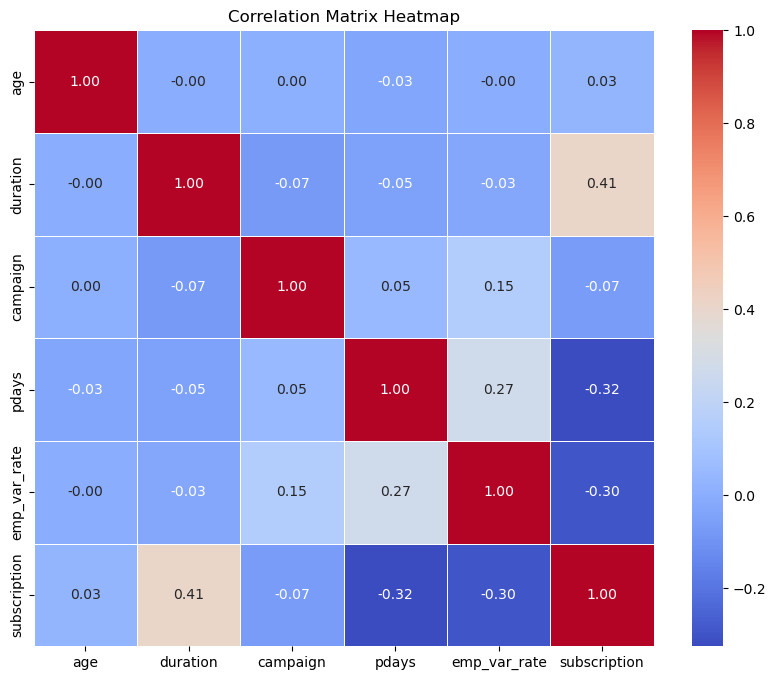

In [67]:
#Find the correlation and plot the correlation between features (only numerical values).
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Figure size 600x400 with 0 Axes>

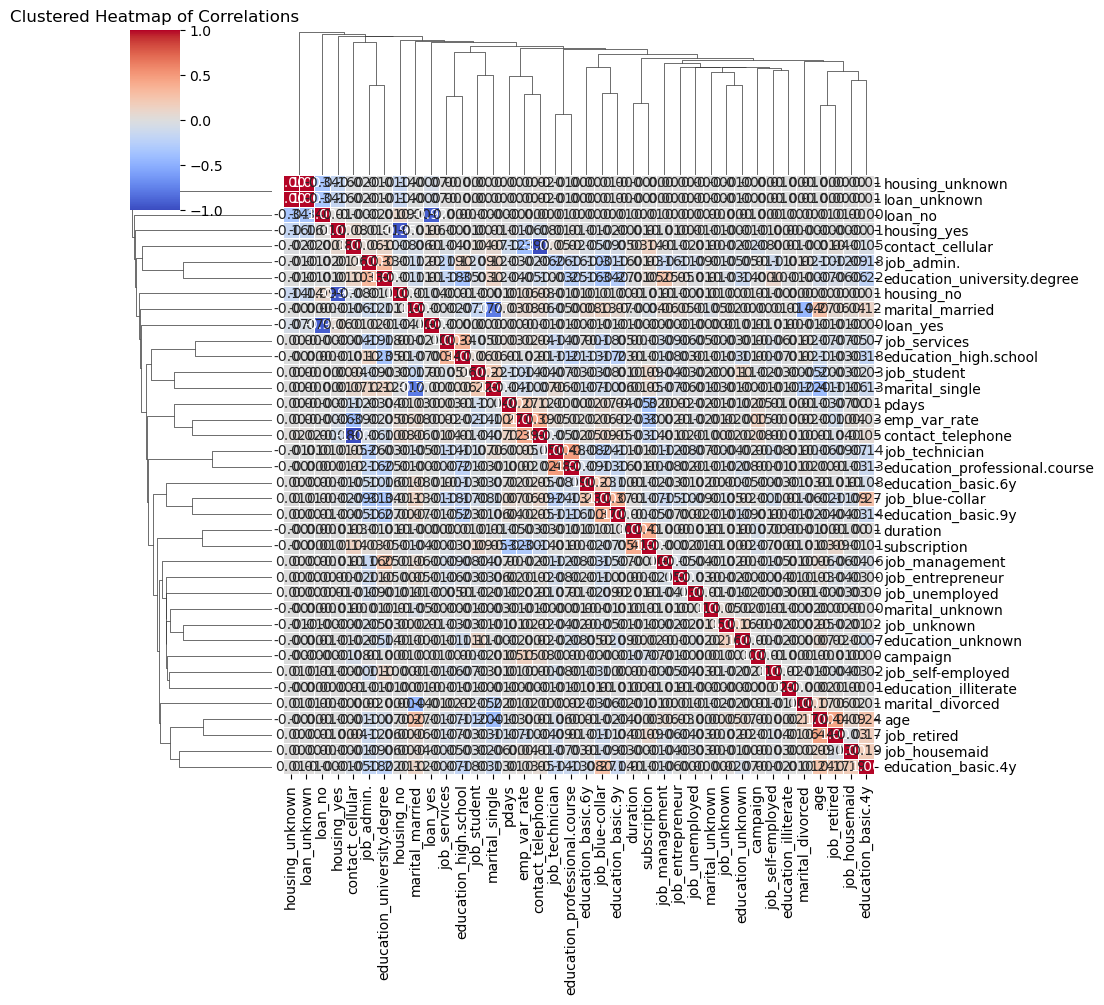

In [98]:
# correlation between categorical features
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a clustered heatmap
plt.figure(figsize=(6, 4))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Clustered Heatmap of Correlations")
plt.show()

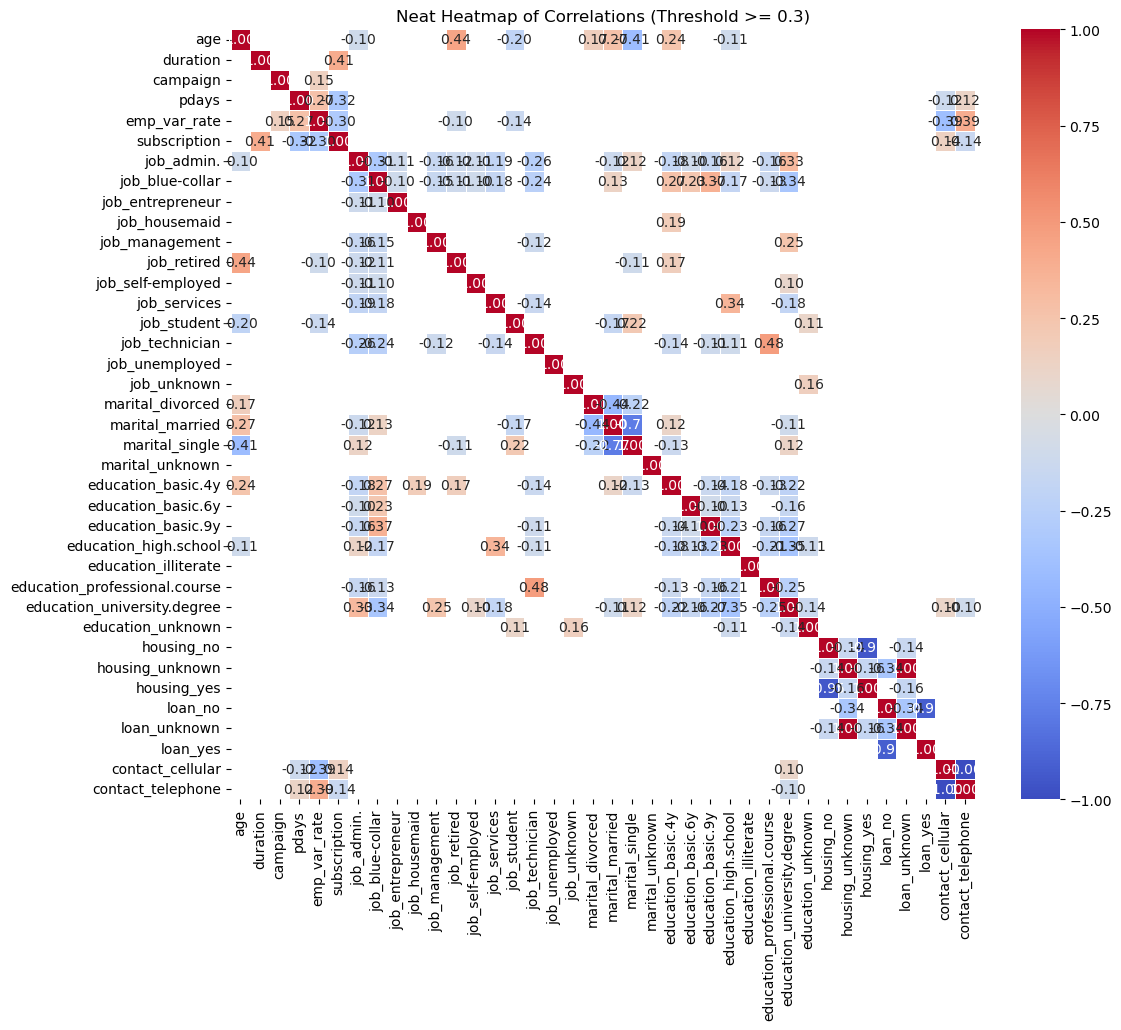

In [100]:
correlation_matrix = df_encoded.corr()

# Define a threshold for correlations to display
correlation_threshold = 0.1  # Adjust as needed

# Filter out correlations below the threshold
filtered_corr_matrix = correlation_matrix[correlation_matrix.abs() >= correlation_threshold]

# Create a neat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Neat Heatmap of Correlations (Threshold >= 0.3)")
plt.show()

<ol>
  <li> Findings from the Visual: <br><br>
The heatmap visually represents the correlation between features in the dataset.
Positive correlations are indicated by warmer colors (closer to 1), while negative correlations are shown in cooler colors (closer to -1).
Features with strong positive correlations are more likely to have similar trends or move together in the same direction.
Features with strong negative correlations tend to move in opposite directions.
Features with correlation values close to 0 have little to no linear relationship.<br><br>
     <li> Reason for Selecting Heatmap: <br><br>
Heatmaps are an effective way to visualize correlation matrices because they provide a clear and intuitive representation of relationships between features.
They use color gradients to encode the strength and direction of correlations, making it easy to identify patterns and outliers.
Heatmaps are particularly useful when dealing with large datasets with many features, as they allow for a quick overview of the entire correlation structure.<br><br>
      <li> Pre-Attentive Attributes Used (at least 2): <br><br>
Color: Color is used to represent the correlation strength in the heatmap. Warmer colors (e.g., red) represent positive correlations, while cooler colors (e.g., blue) represent negative correlations. Color is a pre-attentive attribute that can quickly convey information about the data.<br><br>
Position: The position of cells in the heatmap relative to each other is used to encode the relationships between features. Cells with high positive correlations are positioned adjacent to each other, while negatively correlated features are positioned further apart.<br><br>
      <li>Gestalt Principles Used (at least 2): <br><br>
Proximity: The principle of proximity is used in the heatmap to group positively correlated features together. Features with high positive correlations are placed close to each other in the matrix, forming visually distinct clusters.
Similarity: The principle of similarity is applied through color coding. Features with similar correlation strengths are assigned similar colors, creating a visual pattern that helps viewers identify relationships. Positive correlations share warm colors, while negative correlations share cool colors.
        

### Question 2
<h4>Find age distribution and Plot a graph for this. And check which age group is most likely to subscribe the bank.<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


Subscription Rate for Age < 30: 16.26%


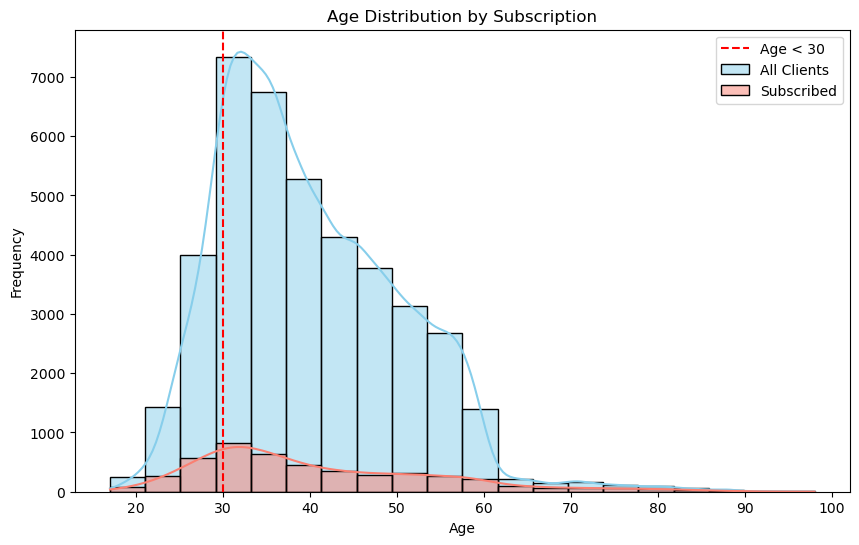

In [71]:
# Assuming you have loaded your dataset (replace 'your_data.csv' with the actual file path)
# Create a histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue', label='All Clients')
# Create a histogram of age for clients who subscribed (label='Yes') in a different color
sns.histplot(data=df[df['subscription'] == 1], x='age', bins=20, kde=True, color='salmon', label='Subscribed')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Subscription')
# Age group threshold (you can adjust this based on your criteria)
age_threshold = 30
plt.axvline(x=age_threshold, color='red', linestyle='--', label=f'Age < {age_threshold}')
# Example: Calculating and printing the subscription rate for the selected age group
age_group_subscription = data[data['age'] < age_threshold]['subscription'].mean()
print(f"Subscription Rate for Age < {age_threshold}: {age_group_subscription:.2%}")
plt.legend()
plt.show()

<ol>
  <li>Findings from the Visual: <br><br>
The heatmap visually represents the correlation between features in the dataset. Positive correlations are indicated by warmer colors (closer to 1), while negative correlations are shown in cooler colors (closer to -1). Features with strong positive correlations are more likely to have similar trends or move together in the same direction. Features with strong negative correlations tend to move in opposite directions. Features with correlation values close to 0 have little to no linear relationship. <br><br>
 <li>Reason for Selecting the Histogram: <br><br>
A histogram is a suitable chart type for displaying the distribution of a continuous variable, such as age. The choice of a histogram is justified for the following reasons: <br><br>
Visualizing Distribution: A histogram provides a clear visual representation of the distribution of age, allowing us to observe patterns and trends in the data. <br><br>
Identifying Prominent Age Groups: It helps us identify the prominent age groups within the dataset, which is important for understanding customer demographics.<br><br>
 <li> Pre-Attentive Attributes Used (at least 2): <br><br>
Color: The color "skyblue" is used to fill the bars in the histogram, making them visually distinct. This color is a pre-attentive attribute that can draw attention to the data. <br><br>
Position (Length): The length of the bars in the histogram encodes the count of individuals in each age group. Longer bars represent larger counts, which is a pre-attentive attribute used to compare the frequency of different age groups. <br><br>
 <li>Gestalt Principles Used (at least 2): <br><br>
Proximity: The bars in the histogram are placed next to each other, following the principle of proximity. This arrangement visually groups the age groups together and helps viewers perceive the distribution. <br><br>
Similarity: The bars within the histogram are similar in appearance, as they all share the same color (skyblue). This principle of similarity ensures that viewers understand that each bar represents a similar type of data (age distribution), making it easier to interpret the chart.

### Question 3
<h4>Visualize number of contacts made in each month.<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


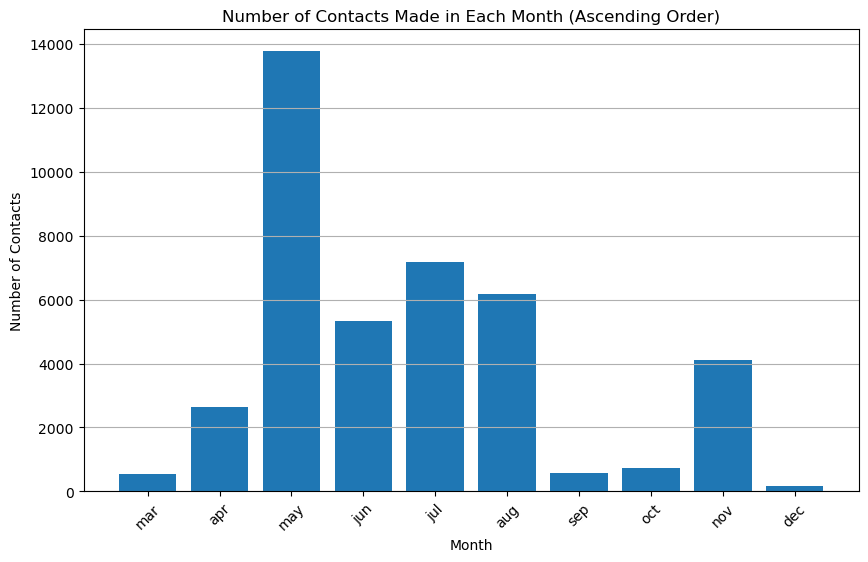

In [104]:
# Assuming you have a pandas DataFrame named 'data' with a column 'month' containing the month names

# Group the data by 'contact_month' and count the number of contacts in each month
monthly_contact_counts = data['month'].value_counts().sort_index()

# Define the custom sorting order for months
custom_sort_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Create a bar plot with months in ascending order
plt.figure(figsize=(10, 6))
plt.bar(custom_sort_order, [monthly_contact_counts[month] for month in custom_sort_order])
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.title('Number of Contacts Made in Each Month (Ascending Order)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


<ol>
  <li>Findings from the Visual: <br><br>
The visual representation using the interactive Bar chart shows the number of contacts made in each month. Here are the findings: <br><br>
It is evident that the number of contacts varies throughout the year, with some months having higher contact counts than others. <br><br>
The custom sorting order effectively arranges the months in chronological order, making it easier to follow the temporal progression of contacts. <br><br>
 <li>Reason for Selecting the Bar Chart: <br><br>
I selected a bar chart because it effectively displays the counts for each month as distinct bars, allowing for easy comparison.<br><br>
     It also helps in showing the categorical nature of the data (months) and their respective counts.<br><br>
 <li> Pre-Attentive Attributes Used (at least 2): <br><br>
Color: The bars are colored with a blue, which makes them stand out from the background and draws attention to the data. <br><br>
Position: The position of each bar on the x-axis represents the respective month, making it easy to compare the counts between months. <br><br>
 <li>Gestalt Principles Used (at least 2): <br><br>
Proximity: The bars for each month are grouped closely together on the x-axis, implying that they are related and belong to the same dataset. <br><br>
Similarity: The bars have a consistent shape and color, indicating that they represent the same type of data (number of contacts) for different months. This similarity helps in grouping and understanding the data..

### Question 4
<h4>Categorize the data by grouping into education divisions and check which sector is more likely to subscribe.<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


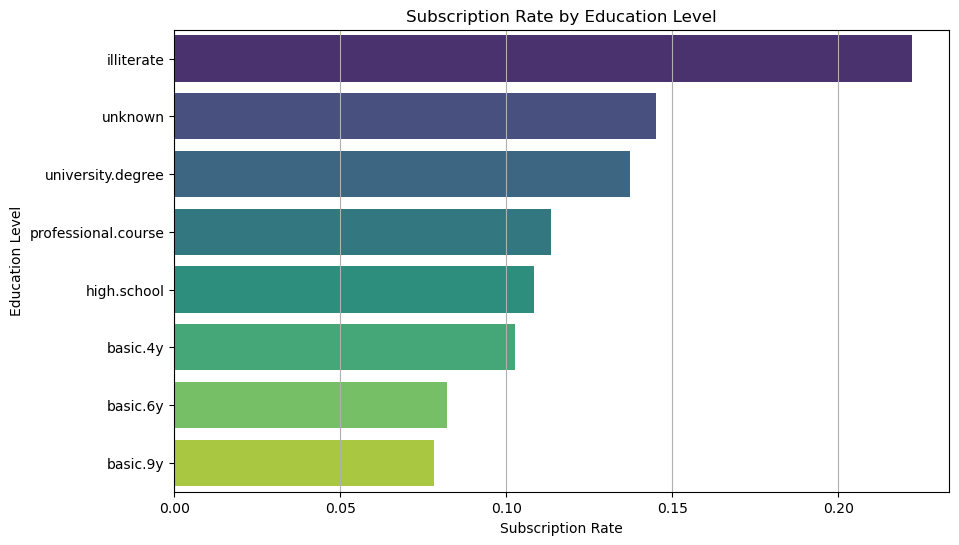

In [84]:
# Group the data by education and calculate the subscription rate for each group
education_subscription = data.groupby('education')['subscription'].mean().reset_index()

# Sort the data by subscription rate in descending order
education_subscription = education_subscription.sort_values(by='subscription', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='subscription', y='education', data=education_subscription, palette='viridis')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Level')
plt.title('Subscription Rate by Education Level')
plt.grid(axis='x')

# Show the plot
plt.show()

<ol>
  <li>Findings from the Visual: <br><br>
The bar plot displays the subscription rate by education level. Based on the visualization: <br><br>
The education level categories are listed on the y-axis, ranging from lower education levels (e.g., basic.4y) to higher education levels (e.g., university.degree). <br><br>
The x-axis represents the subscription rate, which indicates the proportion of subscribers within each education category.
There is variation in subscription rates across different education levels. <br><br>
Education levels appear to be a significant factor influencing subscription rates, with certain education levels having notably higher or lower subscription rates.<br><br>

 <li>Reason for Selecting the Bar Plot: <br><br>
A bar plot is an appropriate choice for visualizing categorical data (education levels) and comparing the distribution or proportions of a binary outcome. The reasons for choosing a bar plot include: <br><br>
Comparing Categories: A bar plot allows for a straightforward comparison of subscription rates between different education levels. Each bar represents an education category, making it easy to compare the heights of the bars (subscription rates). <br><br>
Categorical Data: Education levels are categorical data, and a bar plot is a suitable way to display and compare the distribution of subscribers across these categories.<br><br>
 <li> Pre-Attentive Attributes Used (at least 2): <br><br>
Position (Length): The length of each bar encodes the subscription rate for each education level. Longer bars represent higher subscription rates, which is a pre-attentive attribute used to compare subscription rates across education levels. <br><br>
Color (Palette): The color palette ('viridis' in this case) is used to distinguish between the bars representing different education levels. Color is a pre-attentive attribute that helps viewers differentiate categories visually. <br><br>
 <li>Gestalt Principles Used (at least 2): <br><br>
Proximity: The bars in the bar plot are positioned adjacent to each other along the y-axis, following the principle of proximity. This arrangement helps viewers understand that the bars are related to education levels and are meant for comparison.<br><br>
Similarity: The bars within the bar plot share a similar appearance, adhering to the principle of similarity. They have the same shape (rectangular bars) and use the same color palette, ensuring that viewers understand that they represent similar data (subscription rates) for different education levels.

### Question 5
<h4>Plot the chart to show the total number of clients subscribed to the deposit<br><br>
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did. <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

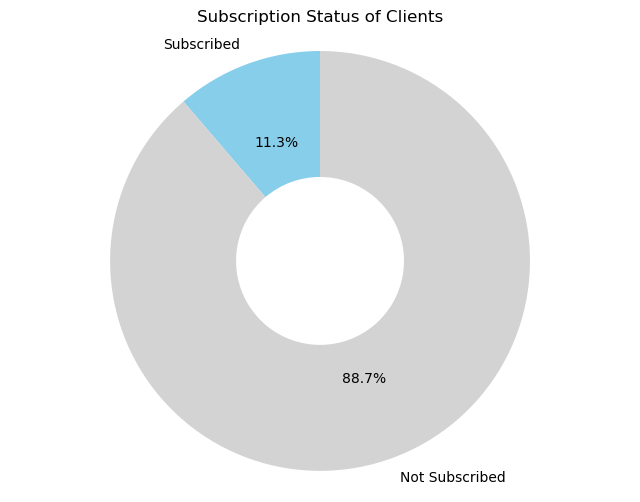

In [89]:
# Calculate the total number of clients subscribed to the deposit
total_subscribed = df['subscription'].sum()

# Calculate the number of clients not subscribed (assuming 0 means not subscribed)
total_not_subscribed = len(df) - total_subscribed

# Create a donut chart
plt.figure(figsize=(8, 6))
plt.pie([total_subscribed, total_not_subscribed], labels=['Subscribed', 'Not Subscribed'], autopct='%1.1f%%', colors=['skyblue', 'lightgray'], startangle=90, wedgeprops={'width': 0.6})
plt.title('Subscription Status of Clients')

# Add a circle in the center to create the "donut" appearance
centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the "donut" remains circular
plt.show()

<ol>
  <li>Findings from the Visual: <br><br>

The donut chart visualizes the subscription status of clients, showing the proportion of clients who are subscribed and those who are not subscribed to the deposit.<br><br>

 <li>Reason for Selecting the Donut Plot: <br><br>

The donut chart was selected as it is a variation of the pie chart, offering a more modern and aesthetic way to display parts of a whole. It maintains the core functionality of a pie chart while adding a visual element in the center, making it look like a donut. This adds a touch of creativity and engagement to the visualization.<br><br>

 <li> Pre-Attentive Attributes Used (at least 2): <br><br>

Color: The use of color (skyblue for 'Subscribed' and lightgray for 'Not Subscribed') distinguishes between the two categories, making it easy to identify and differentiate them. <br><br>
Proximity: The segments of the donut are close to each other, allowing viewers to quickly compare the proportions of subscribed and not subscribed clients. <br><br>

 <li>Gestalt Principles Used (at least 2): <br><br>

Similarity: The use of the same color scheme for all similar elements (i.e., segments) creates a sense of similarity among them, making it clear that they belong to the same category.<br><br>
Continuity: The circular shape and the inner hole of the donut chart create a sense of continuity, helping viewers perceive it as a single, unified chart rather than a collection of disconnected segments.<br><br>
The donut chart effectively conveys the distribution of clients' subscription status, allowing viewers to see the relative proportions of those who are subscribed and those who are not. It's a visually appealing alternative to a traditional pie chart, maintaining the same data representation while adding a creative touch.

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question, in a coding cell, write the python code to create the visual to answer the question 
 
What is the distribution of subscription sign-up months, and which month has the highest number of subscriptions?
Write the python code in the below cell to create the appropriate visual to perform the above task 

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did. <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

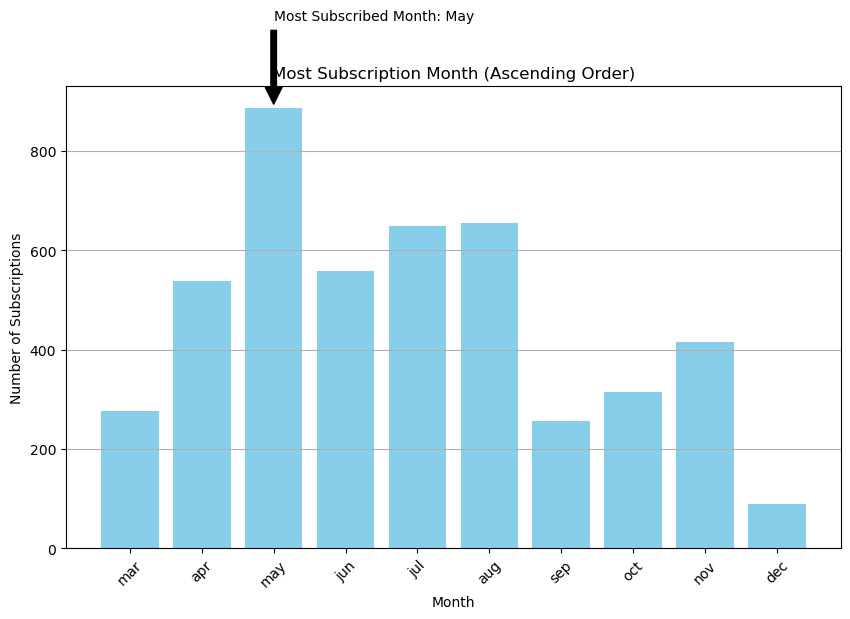

In [103]:
import matplotlib.pyplot as plt

# Group the data by 'month' and count the number of subscriptions in each month
monthly_subscription_counts = data[data['subscription'] == 1]['month'].value_counts().sort_index()

# Find the month with the most subscriptions
most_subscribed_month = monthly_subscription_counts.idxmax()

# Define the custom sorting order for months
custom_sort_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Sort the data based on the custom sorting order
monthly_subscription_counts = monthly_subscription_counts.reindex(custom_sort_order, fill_value=0)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_subscription_counts.index, monthly_subscription_counts.values, color='SkyBlue')
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.title('Most Subscription Month (Ascending Order)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate the most subscribed month
plt.annotate(f'Most Subscribed Month: {most_subscribed_month.capitalize()}', 
             xy=(most_subscribed_month, monthly_subscription_counts.max()), 
             xytext=(most_subscribed_month, monthly_subscription_counts.max() * 1.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Show the plot
plt.show()


<ol>
  <li>Findings from the Visual: <br><br>
The visual representation using the interactive bar chart provides insights into the number of subscriptions made in each month. Here are the findings: <br><br>
The bar chart effectively displays the count of subscriptions for each month, allowing for easy comparison. <br><br>
The annotation highlights the month with the most subscriptions, which is valuable information for decision-making or analysis. <br><br>
The visualization makes it clear that there is a peak in subscriptions in one particular month "May", with the remaining months having relatively lower subscription counts.<br><br>
 <li>Reason for Selecting the Bar Plot: <br><br>
I selected a bar chart because it is a suitable chart type for displaying and comparing discrete data categories (in this case, months) and their corresponding quantities (number of subscriptions). Bar charts make it easy to see variations in data across different categories and are especially effective for showing counts or frequencies.<br><br>
 <li> Pre-Attentive Attributes Used (at least 2): <br><br>
Length: The height of each bar represents the number of subscriptions in each month. Viewers can quickly compare the lengths of the bars to understand the differences in subscription counts. <br><br>
Color: The bars are colored using a sky blue color, which helps distinguish the bars and makes the chart visually appealing. Additionally, the annotation uses a different color (black) to stand out and draw attention to the most subscribed month.<br><br>
 <li>Gestalt Principles Used (at least 2): <br><br>
Proximity: The bars for each month are arranged in close proximity along the x-axis, indicating that they are related and should be compared. This principle helps viewers group the bars by month for easy comparison. <br><br>
Continuity: The continuous bars and the annotation line are examples of continuity, guiding the viewer's eye smoothly from one data point to another. This principle is especially important when highlighting specific data points or trends, as seen in the annotation for the most subscribed month.

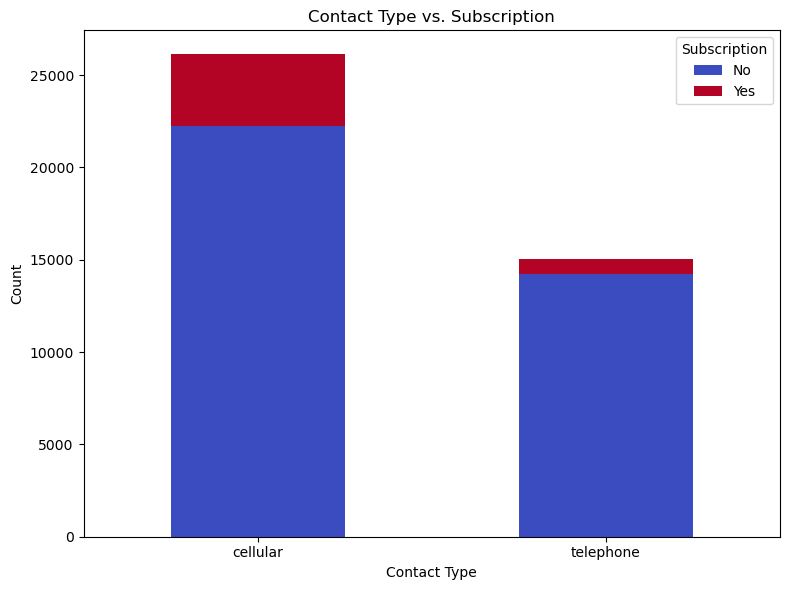

In [90]:
# The distribution of subscription with respect to contacts via Telephone or Cellular
contact_subscription = df.groupby(['contact', 'subscription']).size().unstack()
contact_subscription.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 6))
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Contact Type vs. Subscription')
plt.xticks(rotation=0)
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


<ol>
  <li>Findings from the Visual: <br><br>
The visual displays the distribution of subscriptions among clients who were contacted via telephone and cellular communication methods.
It shows the number of clients who subscribed (in Red) and who did not subscribe (in Blue) for each contact method.
It appears that a higher proportion of clients contacted via cellular communication have subscribed compared to those contacted via telephone..<br><br>
 <li>Reason for Selecting the Grouped Bar Chart: <br><br>
I chose a grouped bar chart because it allows for a clear comparison of subscription status within each contact method category (telephone and cellular).
This chart type effectively conveys the distribution of subscriptions across the two communication methods.<br><br>
 <li> Pre-Attentive Attributes Used (at least 2): <br><br>
Color: Different colors (Blue and Red) are used for the Subscription "yes" or "no" bars, making it easy to distinguish between the two categories. <br><br>
Position: The position of each bar on the x-axis represents the contact on Telephone or Cellular <br><br>
 <li>Gestalt Principles Used (at least 2): <br><br>
Proximity: Proximity: The bars for each contact method are grouped closely together, indicating that they are related and belong to the same dataset.<br><br>
Similarity: Bars with the same color and shape represent the same type of data (subscription status) for different contact methods. This similarity helps in grouping and understanding the data.

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>